<a href="https://colab.research.google.com/github/nescribal/cef/blob/master/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import data

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


Decode a review

In [ ]:
#word_index = imdb.get_word_index()
#reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
#decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
#decoded_review

Encode data to turn it vectors of 0s and 1s. Then we can use a Dense layer, capable of handling floating point vector data.

In [4]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Network with three layers. First 2 of 16 hidden units and the third one binary

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Pick rmsprop as optimizer, binary crossentropy as loss function and monitor accuracy

In [6]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

Train and validate model

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 46ms/step - loss: 0.5370 - accuracy: 0.7895 - val_loss: 0.4365 - val_accuracy: 0.8400
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3361 - accuracy: 0.8970 - val_loss: 0.3794 - val_accuracy: 0.8380
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2485 - accuracy: 0.9205 - val_loss: 0.2953 - val_accuracy: 0.8825
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1971 - accuracy: 0.9361 - val_loss: 0.2818 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1607 - accuracy: 0.9484 - val_loss: 0.2745 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1335 - accuracy: 0.9581 - val_loss: 0.2850 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1131 - accuracy: 0.9651 - val_loss: 0.2926 - val_accuracy: 0.8869
Epoch 8/20
30

In [8]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plot training loss vs validation loss

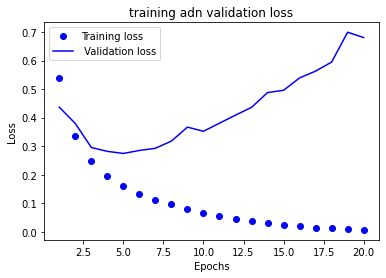

In [10]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label=' Validation loss')
plt.title('training adn validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


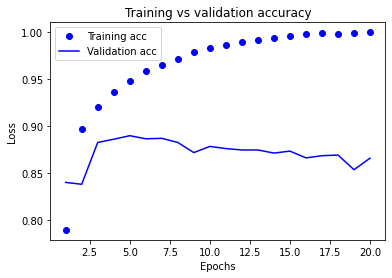

In [13]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training vs validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2263 - accuracy: 0.9465
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1361 - accuracy: 0.9594
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1072 - accuracy: 0.9672
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.4634 - accuracy: 0.8610


In [15]:
results

[0.46336835622787476, 0.8610399961471558]

In [16]:
model.predict(x_test)

array([[0.01377499],
       [0.99999404],
       [0.88462436],
       ...,
       [0.05823407],
       [0.06157529],
       [0.6456615 ]], dtype=float32)